In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [15]:
def plot_from_config(config):
    sample_density = K.config.make_sample_density(config)
    sigmas = sample_density([10000])
    _ = plt.hist(sigmas, bins=100)

torch.Size([10000])


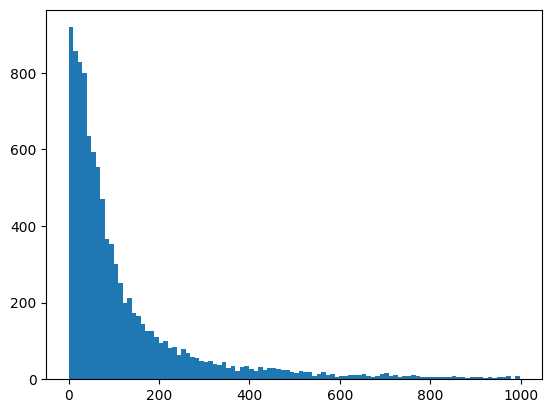

In [27]:
config = { 
    "input_size": 512,
    "loss_config": "vanilla",
    "loss_weighting": "soft-min-snr",
    "sigma_data": 70.907074,
    "sigma_min": 1e-2,
    "sigma_max": 1,
    "normalize_latent_by": "none",
    "sigma_sample_density": {
        "type": "v-diffusion"
    },
}

sample_density = K.config.make_sample_density(config)
sigmas = sample_density([10000])
print(sigmas.shape)
_ = plt.hist(sigmas, bins=100)

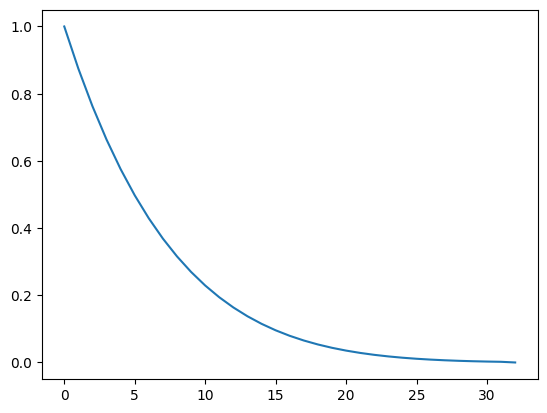

In [25]:
num_sample_steps = 32 # number of sampling steps
sigma_min = 0.002     # min noise level
sigma_max = 80        # max noise level
sigma_data = 0.5      # standard deviation of data distribution
rho = 7               # controls the sampling schedule
P_mean = -1.2         # mean of log-normal distribution from which noise is drawn for training
P_std = 1.2           # standard deviation of log-normal distribution from which noise is drawn for training
S_churn = 80          # parameters for stochastic sampling - depends on dataset, Table 5 in apper
S_tmin = 0.05
S_tmax = 50
S_noise = 1.003

device = torch.device("cuda:0")

N = num_sample_steps
inv_rho = 1 / rho

sigma_max = 1.


steps = torch.arange(num_sample_steps, device = device, dtype = torch.float32)
sigmas = (sigma_max ** inv_rho + steps / (N - 1) * (sigma_min ** inv_rho - sigma_max ** inv_rho)) ** rho

sigmas = F.pad(sigmas, (0, 1), value = 0.) # last step is sigma value of 0.
sigmas = sigmas.cpu().numpy()
plt.plot(sigmas)



/tmp/ipykernel_1682723/582358920.py:2: RuntimeWarning: divide by zero encountered in divide
  logsnr = np.log(sigmas / (1 - sigmas))
/tmp/ipykernel_1682723/582358920.py:2: RuntimeWarning: divide by zero encountered in log
  logsnr = np.log(sigmas / (1 - sigmas))


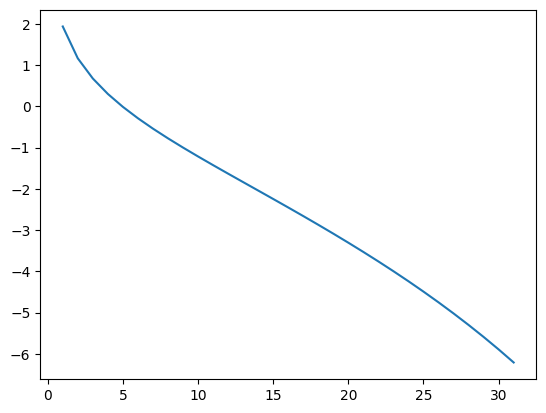

In [29]:
import numpy as np
logsnr = np.log(sigmas / (1 - sigmas))
plt.plot(logsnr)